In [32]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pickle


In [24]:
states = gpd.read_file("shapefile/tl_2024_us_state.shp")
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."
5,1,1,44,01219835,44,0400000US44,RI,Rhode Island,00,G4000,A,2677768885,1323681453,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,0400000US16,ID,Idaho,00,G4000,A,214050504522,2390996667,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,0400000US33,NH,New Hampshire,00,G4000,A,23190211616,1025871482,+43.6727945,-071.5841886,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,0400000US37,NC,North Carolina,00,G4000,A,125935965771,13453455061,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.5446, -77.89942 36.5446..."
9,1,1,50,01779802,50,0400000US50,VT,Vermont,00,G4000,A,23872594714,1030642813,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.0418 44.1566..."


# Non-contiguous states

- HI - Hawaii
- AK - Alaska

# Identifying non-states and territories
- MP - Commonwealth of the Northern Mariana Islands
- GU - Guam
- AS - American Samoa
- PR - Puerto Rico
- VI - United States Virgin Islands


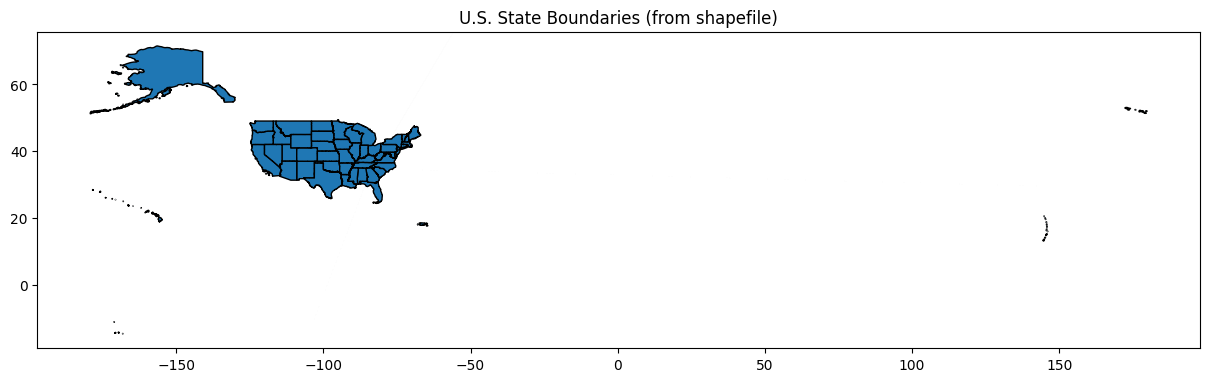

In [25]:
states.plot(figsize=(15, 10), edgecolor='black')
plt.title("U.S. State Boundaries (from shapefile)")
plt.show()

Mainland found at polygon 0


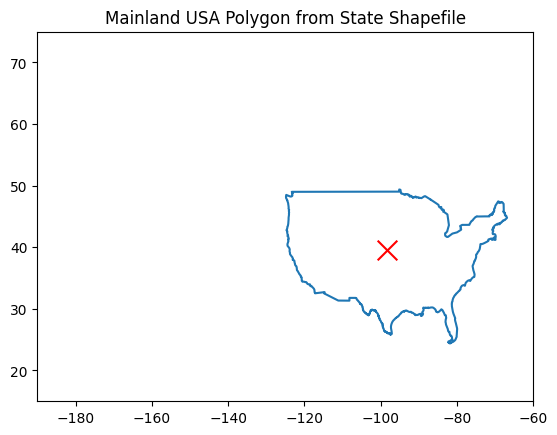

In [30]:
# Filter out HI, AK, and territories to get contiguous USA
contiguous = states[~states["STUSPS"].isin(["HI", "AK", "PR", "VI", "GU", "MP", "AS"])]

# Combine into one geometry (this becomes a MultiPolygon)
mainland_union = contiguous.geometry.union_all()

# Central point in mainland USA
usa_center = Point(-98.35, 39.50)

# Handle MultiPolygon so we can find the mainland polygon
usa_poly = None
if mainland_union.geom_type == "MultiPolygon":
    for idx, geom in enumerate(mainland_union.geoms):
        if usa_center.within(geom):
            print(f"Mainland found at polygon {idx}")
            x, y = geom.exterior.xy
            usa_poly = np.array([(yi, xi) for xi, yi in zip(x, y)])
            break
elif mainland_union.geom_type == "Polygon":
    if usa_center.within(mainland_union):
        x, y = mainland_union.exterior.xy
        usa_poly = np.array([(yi, xi) for xi, yi in zip(x, y)])

if usa_poly is not None:
    plt.plot(usa_poly[:, 1], usa_poly[:, 0])
    plt.scatter([-98.35], [39.50], c='r', marker='x', s=200)
    plt.title("Mainland USA Polygon from State Shapefile")
    plt.xlim([-190, -60])
    plt.ylim([15, 75])
    plt.show()
else:
    print("Could not isolate mainland polygon.")

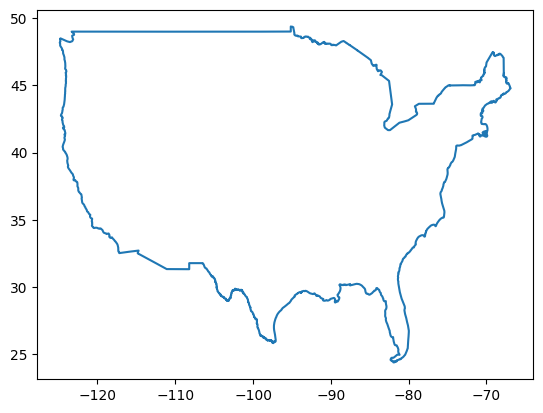

array([[ 29.596769, -93.835677],
       [ 29.596845, -93.836491],
       [ 29.60026 , -93.848588],
       ...,
       [ 29.596576, -93.814351],
       [ 29.595828, -93.825794],
       [ 29.596769, -93.835677]])

In [31]:
plt.plot(usa_poly[:,1],usa_poly[:,0])
plt.show()
usa_poly

In [33]:
pickle.dump(usa_poly,open("usa_poly.pkl","wb"))


# Grid Generation

In [34]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

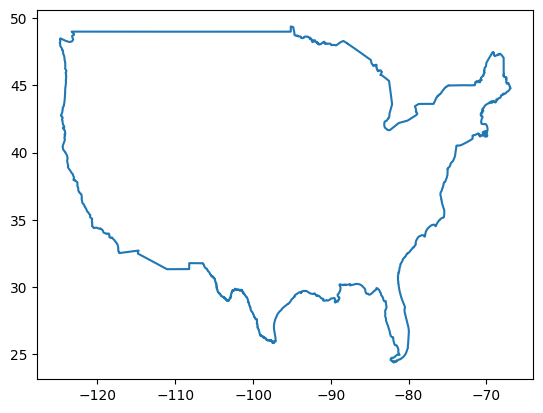

In [36]:
usa_poly = pickle.load(open("usa_poly.pkl",'rb'))
usa_poly = Polygon(np.flip(usa_poly))
x,y = usa_poly.exterior.xy
plt.plot(x,y)

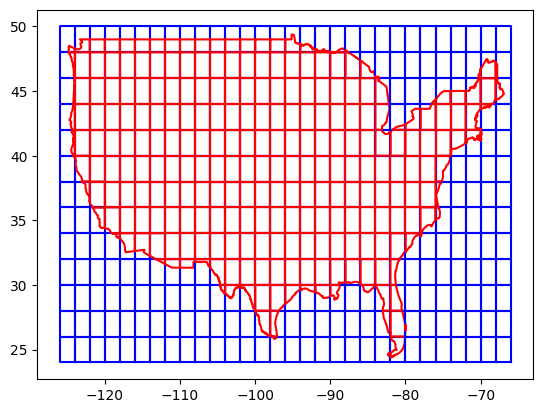

In [37]:
dim = 2
bounds = usa_poly.bounds
xmin = int(bounds[0] // dim)
xmax = int(bounds[2] // dim)
ymin = int(bounds[1] // dim)
ymax = int(bounds[3] // dim)
for i in range(xmin, xmax+1):
    for j in range(ymin, ymax+1):
        b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
        g = usa_poly.intersection(b)
        x,y = b.exterior.xy
        plt.plot(x,y,c='b')
        if g.is_empty:
            continue
        if type(g)==shapely.geometry.multipolygon.MultiPolygon:
            for gems in g.geoms:
                x,y = gems.exterior.xy
                plt.plot(x,y,c='r')
        else:
            x,y = g.exterior.xy
            plt.plot(x,y,c='r')
plt.show()

In [38]:
def partition(polygon, dim, mergeFactor=0.1):
    '''
    polygon: Unsplit polygon of mainland US
    dim: The dimensions of each grid to split the map into
    mergeFactor: threshold of smallest grid.
    Any grid smaller will be combined with neighbouring grids
    '''
    bounds = polygon.bounds
    xmin = int(bounds[0] // dim)
    xmax = int(bounds[2] // dim)
    ymin = int(bounds[1] // dim)
    ymax = int(bounds[3] // dim)
    grid = 0
    res = []
    for i in range(xmin, xmax+1):
        for j in range(ymin, ymax+1):
            b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
            g = polygon.intersection(b)
            if g.is_empty:
                continue
            if type(g)==shapely.geometry.multipolygon.MultiPolygon:
                for gems in g.geoms:
                    res.append(gems)
                    grid += 1
            else:
                res.append(g)
                grid += 1
    return merge(res, mergeFactor)

def merge(polyList, mergeFactor=0.1):
    '''
    polyList: list of polygon grids the map is split into
    mergeFactor: threshold of smallest grid.
    Any grid smaller will be combined with neighbouring grids
    '''
    def combine(pidx, polyL):
        p = polyL[pidx]
        del polyL[pidx]
        for idx,i in enumerate(polyL):
            u = p.union(i)
            if p.intersects(i) and type(u)!=shapely.geometry.multipolygon.MultiPolygon:
                polyL[idx] = u
                break
        return polyL

    mnLimit = max(polyList, key=lambda x:x.area).area * mergeFactor
    mnPoly = min(polyList, key=lambda x:x.area)
    while(mnPoly.area<=mnLimit):
        polyList = combine(polyList.index(mnPoly), polyList)
        mnPoly = min(polyList, key=lambda x:x.area)

    result = {}
    for idx,i in enumerate(polyList):
        x,y = i.exterior.xy
        result[idx] = np.array([(y,x) for x,y in zip(x,y)])
    return result

def plotMap(polyGrid):
    gPoly = []
    gMarkLoc = []
    gMarkInf = []
    info_box_template = """
    <dl>
    <dd>{}</dd>
    </dl>
    """
    for k,v in polyGrid.items():
        gPoly.append(gmaps.Polygon(
                        list(v),
                        stroke_color='red',
                        fill_color='blue'
                        ))
        gMarkLoc.append((v[0][0],v[0][1]))
        gMarkInf.append(info_box_template.format(k))
    fig = gmaps.figure(center=(39.50,-98.35), zoom_level=4, map_type='TERRAIN')
    fig.add_layer(gmaps.drawing_layer(features=gPoly))
#     fig.add_layer(gmaps.marker_layer(gMarkLoc, info_box_content=gMarkInf))
    return fig

In [39]:
usaPolygonGrid = partition(usa_poly, 2, mergeFactor=0.1)

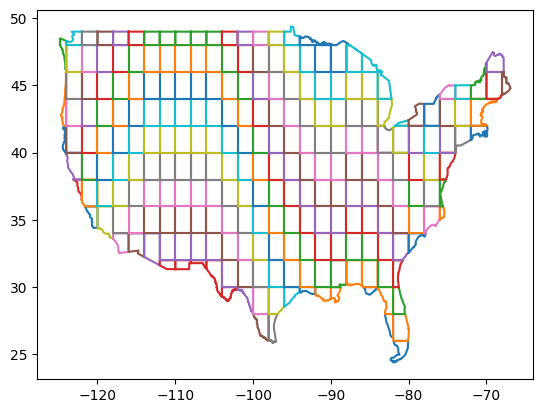

246

In [40]:
for i in usaPolygonGrid.values():
    plt.plot(i[:,1],i[:,0])
plt.show()
len(usaPolygonGrid)

In [42]:
plotMap(usaPolygonGrid)

Figure(layout=FigureLayout(height='420px'))

In [43]:
pickle.dump(usaPolygonGrid,open("usaPolygonGrid.pkl","wb"))